# <span style="color:darkorange"> Exercises 07 (NSL) </span>
____________________

# <span style="color:darkorange"> 07.1: Tail corrections to MD_MC code </span>

To simplify the calculation of potential energy, the code takes into account the <span style="color:darkorange">contributions</span> coming only <span style="color:darkorange">from closely interacting particles</span>, thus applying a <span style="color:darkorange">spherical cutoff</span>, i.e. a limit distance beyond which the pair-wise potential vanishes.
If the system is in fact governed by a rapidly decreasing potential, the introduction of such a modification to the potential acts as a <span style="color:darkorange">small perturbation</span> on the predictions, provided that the cutoff radius is large enough. 

To compensate for the minor flaw of neglecting long-distance interactions, the reviewed code includes the following <span style="color:darkorange">tail correction terms</span>:

$$
\frac{{\langle U^\star \rangle}_{tail}}{N} = \frac{8\pi}{3} \frac{\rho^\star}{\left(r_c^\star\right)^3} \left( \frac{1}{3\left(r_c^\star\right)^6} - 1 \right)
$$

$$
P^\star =  32 \pi N  \frac{\rho^\star}{\left(r_c^\star\right)^3}\left( \frac{1}{3\left(r_c^\star\right)^6}-\frac{1}{2} \right)
$$

where all quantities are expressed in <font color="darkorange">reduced Lennard-Jones units</font> ($\sigma$ for length, $\epsilon$ for energy, $m$ for mass).


____________________
# <span style="color:darkorange"> 07.2: Uncertainties and autocorrelations </span>

To print out the <font color="darkorange">instantaneous values</font> (`nblk=1`) for $U/N$, the simulation needs to be properly thermalized by using the Metropolis algorithm (`iNVET` = 1 for MC(NVT) moves), which works best if the <font color="darkorange">acceptance</font> is <font color="darkorange">near $50\%$</font>. Since temperature is fixed, the only tunable parameter to influence acceptance around $50\%$ is `delta`. Setting `nstep`$=5\times10^5$ for every phase and, respectively:

|  phase   | `delta` | $\rho^\star$ | $T^\star$ | $r_c^\star$ |
| -------- | ------- | ------------ | --------- | ----------- | 
| solid    |    $0.12$ | $1.1$          | $0.8$       |     $2.2$     |
| liquid   |    $0.19$     | $0.8$          | $1.1$       |     $2.5$     |
| gas      |     $7.3$    | $0.05$         | $1.2$       |     $5.0$     |


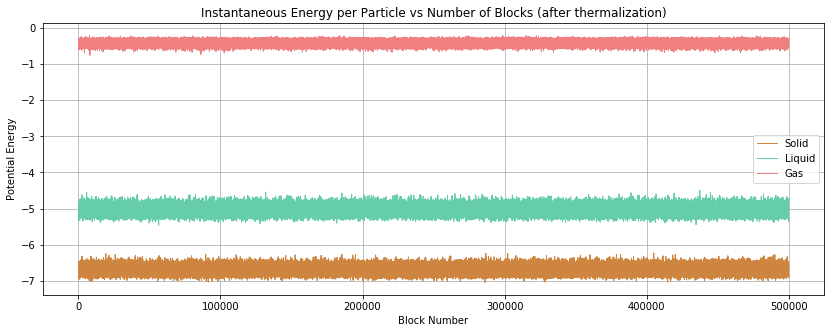

In [5]:
import matplotlib.pyplot as plt

# Initialize lists to store the block numbers and potential energy values for each phase
blocks_solid, potential_energy_solid = [], []
blocks_liquid, potential_energy_liquid = [], []
blocks_gas, potential_energy_gas = [], []

# Read the data for the solid phase
with open('./tail/7.2/output_epot_solid.dat', 'r') as file:
    for line in file:
        columns = line.split()
        block_number = int(columns[0])
        pot_energy_value = float(columns[1])
        blocks_solid.append(block_number)
        potential_energy_solid.append(pot_energy_value)

# Read the data for the liquid phase
with open('./tail/7.2/output_epot_liquid.dat', 'r') as file:
    for line in file:
        columns = line.split()
        block_number = int(columns[0])
        pot_energy_value = float(columns[1])
        blocks_liquid.append(block_number)
        potential_energy_liquid.append(pot_energy_value)

# Read the data for the gas phase
with open('./tail/7.2/output_epot_gas.dat', 'r') as file:
    for line in file:
        columns = line.split()
        block_number = int(columns[0])
        pot_energy_value = float(columns[1])
        blocks_gas.append(block_number)
        potential_energy_gas.append(pot_energy_value)

# Plot all three data sets on the same canvas
plt.figure(figsize=(14, 5))
plt.plot(blocks_solid, potential_energy_solid, color='peru', linestyle='-', linewidth=1, markersize=5, label='Solid')
plt.plot(blocks_liquid, potential_energy_liquid, color='mediumaquamarine', linestyle='-', linewidth=1, markersize=5, label='Liquid')
plt.plot(blocks_gas, potential_energy_gas, color='lightcoral', linestyle='-', linewidth=1, markersize=5, label='Gas')

# Add labels, title, legend, and grid
plt.xlabel('Block Number')
plt.ylabel('Potential Energy')
plt.title('Instantaneous Energy per Particle vs Number of Blocks (after thermalization)')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

____________
## Vanishing of correlations

For measurements to be <font color="darkorange">independent</font>, they should be spaced by an <font color="darkorange">adequate time interval</font> that allows <font color="darkorange">correlations</font> to <font color="darkorange">vanish</font>. Otherwise, the estimators for physical quantities and their uncertainties will suffer from a bias.
A measure of how fast correlations fade is given by the <font color="darkorange">autocorrelation function</font>, which is the statistical covariance of a stochastic process with a version of itself that has a <font color="darkorange">time lag</font> $t$:

$$ 
\displaystyle{\chi(t)} := 
\displaystyle{ Ac_{\left[U\right]}\left(t\right) } =
\displaystyle{ \frac{\langle U(t')U(t'+t) \rangle-\langle U(t') \rangle\langle U(t'+t) \rangle}{\sigma_U^2} } =
\displaystyle{ \frac{ \displaystyle{ \frac{1}{t_{max} - t} \sum_{t' = 0}^{t_{max} - t } U(t') U(t' + t) - \left( \frac{1}{t_{max} - t} \sum_{t' = 0}^{t_{max} - t } U(t') \right) \left( \frac{1}{t_{max} - t} \sum_{t' = 0}^{t_{max} - t } U(t'+t) \right) } } { \displaystyle{ \frac{1}{t_{max}} \sum_{t'=0}^{t_{max}} (U(t'))^2 - \left( \frac{1}{t_{max}} \sum_{t'=0}^{t_{max}} U(t') \right)^2 } } }
$$

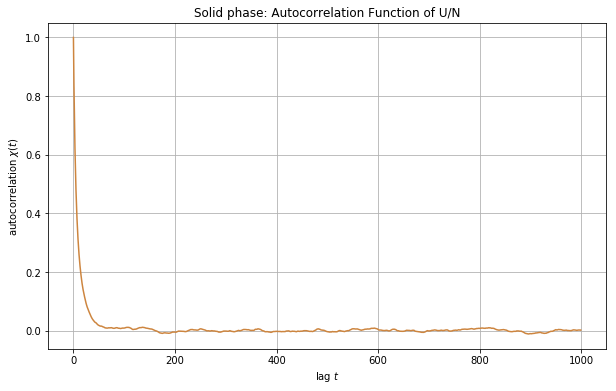

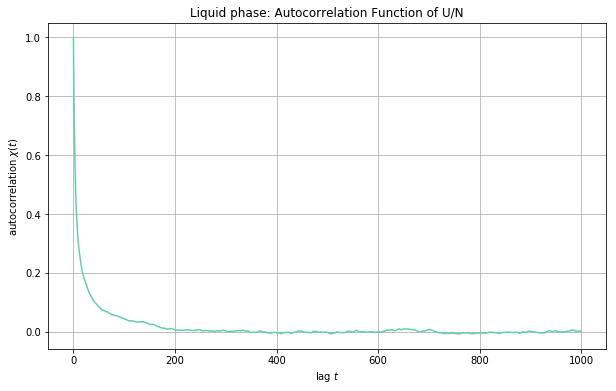

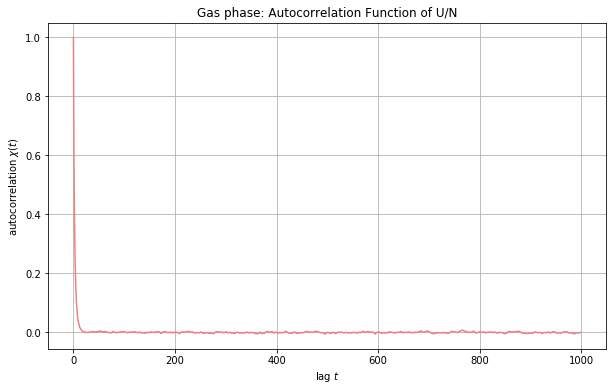

In [23]:
import numpy as np
import matplotlib.pyplot as plt

################## FUNCTIONS ##################

max_lag = 1000

# Function to calculate autocorrelation
def autocorrelation(data, max_lag):
    t_max = len(data)
    mean = np.mean(data)
    var = np.var(data)
    acf = []

    for t in range(max_lag):
        cov = np.mean([data[tprime] * data[tprime + t] for tprime in range(t_max - t)]) - \
              np.mean([data[tprime] for tprime in range(t_max - t)]) * \
              np.mean([data[tprime + t] for tprime in range(t_max - t)])
        acf.append(cov / var)

    return np.array(acf)

# Function to plot autocorrelation
def plot_autocorrelation(data, phase, color, max_lag):
    acf = autocorrelation(data, max_lag)
    plt.figure(figsize=(10, 6))
    plt.plot(range(max_lag), acf, color=color)
    plt.xlabel('lag $t$')
    plt.ylabel('autocorrelation $\chi(t)$')
    plt.title(f'{phase.capitalize()} phase: Autocorrelation Function of U/N')
    plt.grid(True)
    plt.show()
    return acf

# Function to read data from a file and extract the second column
def read_data(file_path):
    data = np.loadtxt(file_path, usecols=1)  # Assuming second column contains potential energy values
    return data

################## MAKE PLOTS ##################

# File paths
solid_file = './tail/7.2/output_epot_solid.dat'
liquid_file = './tail/7.2/output_epot_liquid.dat'
gas_file = './tail/7.2/output_epot_gas.dat'

# Read data from files
solid_data = read_data(solid_file)
liquid_data = read_data(liquid_file)
gas_data = read_data(gas_file)

# Plot autocorrelation for each phase with specified colors
acf_solid = plot_autocorrelation(solid_data, 'solid', 'peru', max_lag)
acf_liquid = plot_autocorrelation(liquid_data, 'liquid', 'mediumaquamarine', max_lag)
acf_gas = plot_autocorrelation(gas_data, 'gas', 'lightcoral', max_lag)

____________
## Data blocking

A versatile method for error estimation is dividing the $M$ data into $L=M/N$ blocks of size $N$ and treating the <font color="darkorange">average from each block</font> as a single measurement, thus dealing with <font color="darkorange">uncorrelated</font> quantities, provided that the blocks are <font color="darkorange">large enough</font>. 
A <font color="darkorange">modest uncertainty</font> about a block average is not a demerit, but rather an indication that the block of Metropolis <font color="darkorange">moves are not correlated</font> to a point that the quantity estimate becomes flawed because of a systematic underestimation or overestimation tendency.

The plots show the <font color="darkorange">estimation of the statistical uncertainty</font> of $\langle U/N \rangle$ for block sizes that range in the interval $\left[ 10, 5\times 10^3 \right]$:


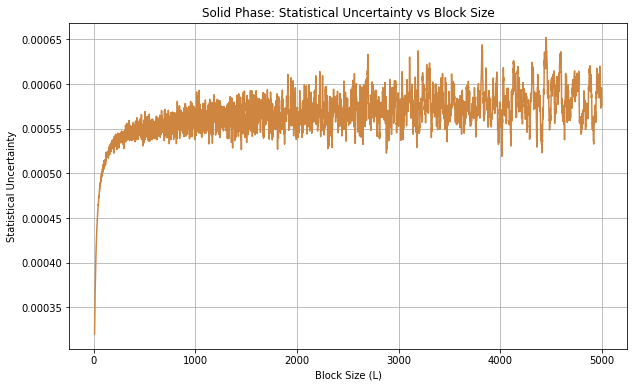

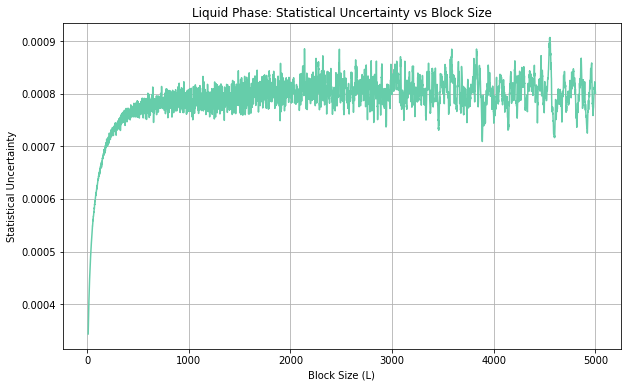

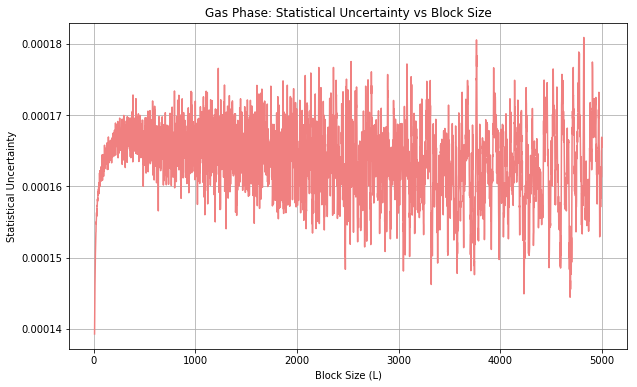

In [24]:
import numpy as np
import matplotlib.pyplot as plt

################## FUNCTIONS ##################

# function to read file
def read_data(file_path):
    data = np.loadtxt(file_path, usecols=1)  # second column contains potential U/N estimates
    return data

# function to perform different groupings for data blocking on a long list of M data
def data_blocking(data, min_block_size=10, max_block_size=5000):
    M = len(data)
    block_sizes = np.arange(min_block_size, max_block_size + 1, 1)
    means = []
    uncertainties = []
    for L in block_sizes:
        if L > M:
            break
        N = M // L # floor division
        block_means = np.array([np.mean(data[i*L:(i+1)*L]) for i in range(N)]) # 
        mean = np.mean(block_means) # mean of a blk
        std_dev = np.std(block_means) / np.sqrt(N - 1) # uncertainty of a single blk ave
        means.append(mean) # save to list
        uncertainties.append(std_dev) # save to list
    return block_sizes, np.array(means), np.array(uncertainties) # the means list is not really used...

# function to do plot of uncertainties
def plot_uncertainties(block_sizes, uncertainties, phase, color):
    plt.figure(figsize=(10, 6))
    plt.plot(block_sizes, uncertainties, '-', color=color)
    #plt.xscale('log')
    #plt.yscale('log')
    plt.xlabel('Block Size (L)')
    plt.ylabel('Statistical Uncertainty')
    plt.title(f'{phase.capitalize()} Phase: Statistical Uncertainty vs Block Size')
    plt.grid(True)
    plt.show()

################## MAKE PLOTS ##################
    
# define file paths
solid_file = './tail/7.2/output_epot_solid.dat'
liquid_file = './tail/7.2/output_epot_liquid.dat'
gas_file = './tail/7.2/output_epot_gas.dat'
# read data from files
solid_data = read_data(solid_file)
liquid_data = read_data(liquid_file)
gas_data = read_data(gas_file)
# calculate errors for different block sizes
block_sizes_solid, means_solid, uncertainties_solid = data_blocking(solid_data)
block_sizes_liquid, means_liquid, uncertainties_liquid = data_blocking(liquid_data)
block_sizes_gas, means_gas, uncertainties_gas = data_blocking(gas_data)
# plot statistical uncertainties for each phase
plot_uncertainties(block_sizes_solid, uncertainties_solid, 'solid', 'peru')
plot_uncertainties(block_sizes_liquid, uncertainties_liquid, 'liquid', 'mediumaquamarine')
plot_uncertainties(block_sizes_gas, uncertainties_gas, 'gas', 'lightcoral')



In view of the above, it is safe to assume that a  <font color="darkorange">block size of $N=1500$</font> is a reasonable choice.

____________________
# <span style="color:darkorange"> 07.3: Radial distribution function RDF </span>

The <a href="https://chem.libretexts.org/Bookshelves/Biological_Chemistry/Concepts_in_Biophysical_Chemistry_(Tokmakoff)/01%3A_Water_and_Aqueous_Solutions/01%3A_Fluids/1.02%3A_Radial_Distribution_Function"><font color="darkorange">RDF</font></a> $g(r)$ is the <font color="darkorange">average distribution</font> of particles <font color="darkorange">around a central reference particle</font>. 
It is measure of <font color="darkorange">coordination emerging</font> in a fluid at molecular length scales: as a matter of fact, its constituent particles of a fluid tend to pack together because of the <font color="darkorange">interactions</font> between them. Given the hypothesis that the fluid is <font color="darkorange">macroscopically isotropic</font>, the density of particles approaches the constant value in a truly uniform substance, so $g(r)$ approaches $1$.

The RDF can be obtained as a <font color="darkorange">histogram</font> with:

$$
g(r^\star) = \frac{1}{\rho^\star N \frac{4 \pi}{3} \left[ ( r^\star+dr^\star )^3 - (r^\star)^3 \right]} \left\langle \sum_{i=1}^{N} \sum_{j \neq i = 1}^{N} \delta\left( r^\star - \left| \vec{r^\star_i} - \vec{r^\star_j} \right|\right) \right\rangle,
$$

thus, each block yields $g(r)$ estimated at `N_bins` different points in $\left( 0, l/2\right)$, with $l$ being the side of the box. 
A possible strategy for achieving this is using a matrix `vector<vector<double>> rdf_blocks` of dimension `n_blocks=100` $\times$ `n_bins=500` to record the block <font color="darkorange">average progression for each discretized point</font> $r_i$ (corresponding to the $i$-th bin) that is used to calculate $g$.

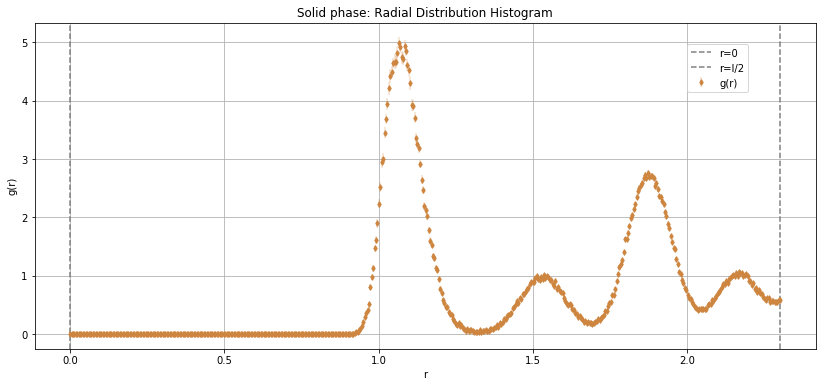

In [90]:
import numpy as np
import matplotlib.pyplot as plt

# Read data from file
data = np.loadtxt("./tail/7.3/RDF_RESULTS_solid.dat")

# Extracting data columns
bin_index = data[:, 0]
g_r_avg = data[:, 1]
g_r_err = data[:, 2]

# Plotting g(r)
plt.figure(figsize=(14, 6))
plt.errorbar(bin_index, g_r_avg, yerr=g_r_err, markersize=4, fmt='d', linewidth=0.4 , label='g(r)', color='peru', ecolor='peru')
plt.xlabel('r')
plt.ylabel('g(r)')
plt.title('Solid phase: Radial Distribution Histogram')
plt.grid(True)

# Add vertical lines
plt.axvline(x=0, color='gray', linestyle='--', label='r=0')
plt.axvline(x=np.max(bin_index), color='gray', linestyle='--', label='r=l/2')

# Adjust legend position
plt.legend(loc='upper right', bbox_to_anchor=(0.92, 0.95))

plt.show()

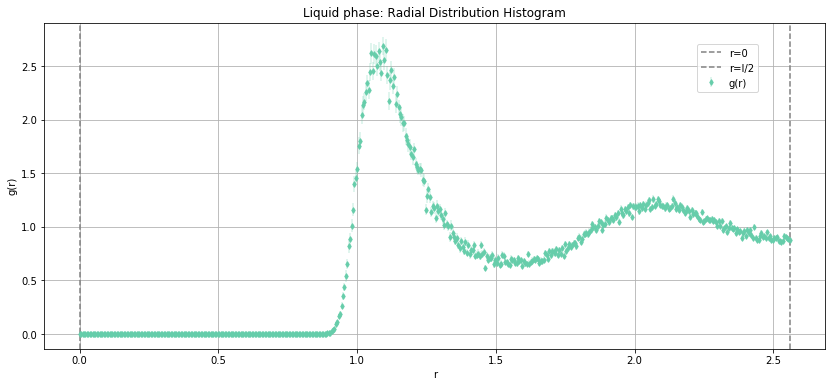

In [91]:
import numpy as np
import matplotlib.pyplot as plt

# Read data from file
data = np.loadtxt("./tail/7.3/RDF_RESULTS_liquid.dat")

# Extracting data columns
bin_index = data[:, 0]
g_r_avg = data[:, 1]
g_r_err = data[:, 2]

# Plotting g(r)
plt.figure(figsize=(14, 6))
plt.errorbar(bin_index, g_r_avg, yerr=g_r_err, markersize=4, fmt='d', linewidth=0.4 , label='g(r)', color='mediumaquamarine', ecolor='mediumaquamarine')
plt.xlabel('r')
plt.ylabel('g(r)')
plt.title('Liquid phase: Radial Distribution Histogram')
plt.grid(True)

# Add vertical lines
plt.axvline(x=0, color='gray', linestyle='--', label='r=0')
plt.axvline(x=np.max(bin_index), color='gray', linestyle='--', label='r=l/2')

# Adjust legend position
plt.legend(loc='upper right', bbox_to_anchor=(0.92, 0.95))

plt.show()

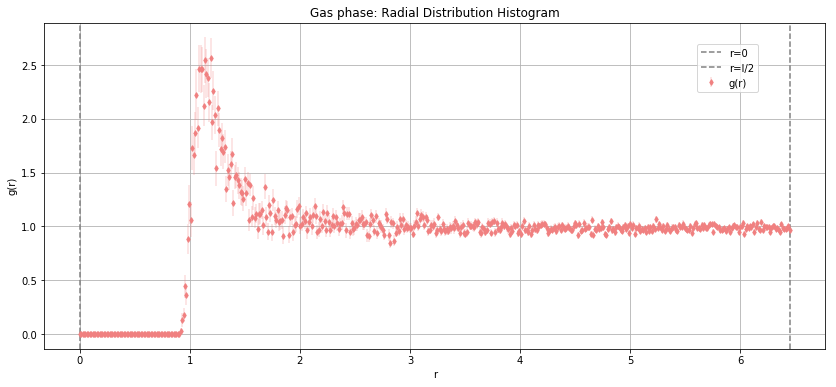

In [92]:
import numpy as np
import matplotlib.pyplot as plt

# Read data from file
data = np.loadtxt("./tail/7.3/RDF_RESULTS_gas.dat")

# Extracting data columns
bin_index = data[:, 0]
g_r_avg = data[:, 1]
g_r_err = data[:, 2]

# Plotting g(r)
plt.figure(figsize=(14, 6))
plt.errorbar(bin_index, g_r_avg, yerr=g_r_err, markersize=4, fmt='d', linewidth=0.4 , label='g(r)', color='lightcoral', ecolor='lightcoral')
plt.xlabel('r')
plt.ylabel('g(r)')
plt.title('Gas phase: Radial Distribution Histogram')
plt.grid(True)

# Add vertical lines
plt.axvline(x=0, color='gray', linestyle='--', label='r=0')
plt.axvline(x=np.max(bin_index), color='gray', linestyle='--', label='r=l/2')

# Adjust legend position
plt.legend(loc='upper right', bbox_to_anchor=(0.92, 0.95))

plt.show()

____________________
# <span style="color:darkorange"> 07.4: Lennard-Jones model - NVT and NVE simulations </span>

To fully apply the MD_MC code, a <font color="darkorange">NVT simulation</font> of Argon ($\sigma = 0.34$ nm, $\epsilon/k_B = 120$ K, $m=39.948$ amu) is carried out in the following conditions:

|  phase   | $\rho^\star$ | $T^\star$   | $r_c^\star$   |
| -------- | ------------ | ---------   | -----------   | 
| solid    |  $1.1$       | $0.8$       |     $2.2$     |
| liquid   |  $0.8$       | $1.1$       |     $2.5$     |
| gas      |  $0.05$      | $1.2$       |     $5.0$     |

and under the assumption that such a gas is described by a Lennard-Jones potential. As usual, measurements are taken only after thermalization.

Furthermore, the <font color="darkorange">predictions</font> of NVE and NVT about the emerging <font color="darkorange">coordination</font> are compared.

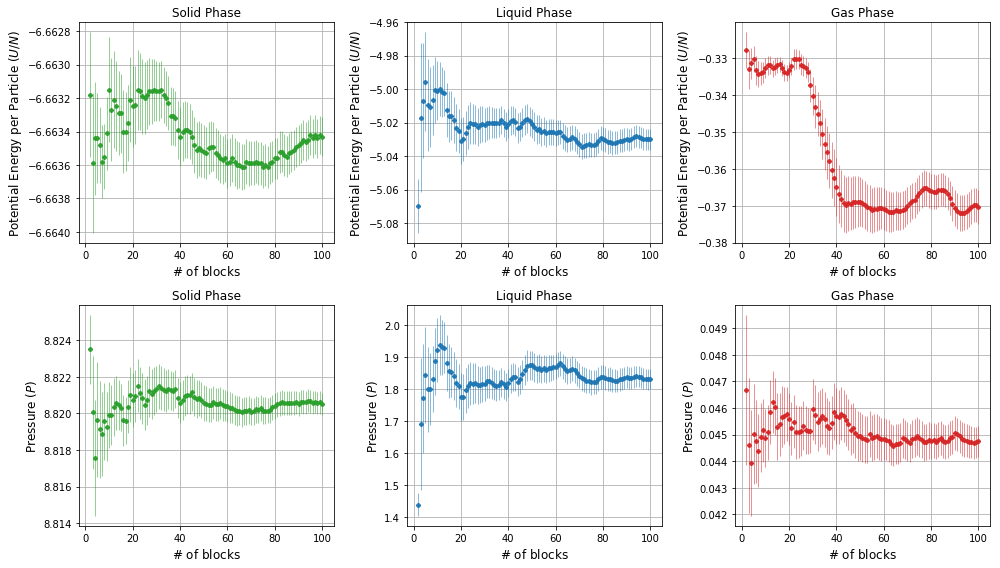

In [173]:
import numpy as np

# Define a function to read data from file
def read_data(filename):
    data = []
    with open(filename, 'r') as f:
        for line in f:
            if line.strip():  # ignore empty lines
                cols = line.split()
                data.append([float(cols[0]), float(cols[2]), float(cols[3])])
    return data

# Define a function to process data
def process_data(data):
    x = [row[0] for row in data[1:]]  # Exclude the first data point
    y = [row[1] for row in data[1:]]
    y_err = [row[2] for row in data[1:]]
    return x, y, y_err

# Read data for potential energy per particle (U/N) and pressure (P) for each phase
phases = ['solid', 'liquid', 'gas']
data_epot = {phase: read_data(f'./tail/7.4/output_epot_{phase}.dat') for phase in phases}
data_pres = {phase: read_data(f'./tail/7.4/output_pres_{phase}.dat') for phase in phases}

# Process data for potential energy per particle (U/N) and pressure (P)
epot_data = {phase: process_data(data_epot[phase]) for phase in phases}
pres_data = {phase: process_data(data_pres[phase]) for phase in phases}

import matplotlib.pyplot as plt

# Function to create subplots
def create_subplot(ax, x, y, y_err, color, ylabel, title):
    ax.errorbar(x, y, yerr=y_err, color=color, fmt='P', markersize=4, linewidth=0.5, ecolor=color)
    ax.set_xlabel('$\#$ of blocks', fontsize=12) 
    ax.set_ylabel(ylabel, fontsize=12)  
    ax.set_title(title, fontsize=12)  
    ax.grid(True)

# Create figure and axes
fig, axs = plt.subplots(2, 3, figsize=(14, 8))

# Colors for the plots
colors = ['tab:green', 'tab:blue', 'tab:red']

# Labels for the plots
labels = ['Potential Energy per Particle ($U/N$)', 'Pressure ($P$)']

# Plot data for each phase
for i, phase in enumerate(phases):
    # Potential energy per particle (U/N)
    create_subplot(axs[0, i], *epot_data[phase], colors[i], labels[0], f'{phase.capitalize()} Phase') # * unpacks a tuple
    # Pressure (P)
    create_subplot(axs[1, i], *pres_data[phase], colors[i], labels[1], f'{phase.capitalize()} Phase')

# Adjust layout
plt.tight_layout()
plt.show()

________________
## MC (NVT) vs MD (NVE): radial distribution functions

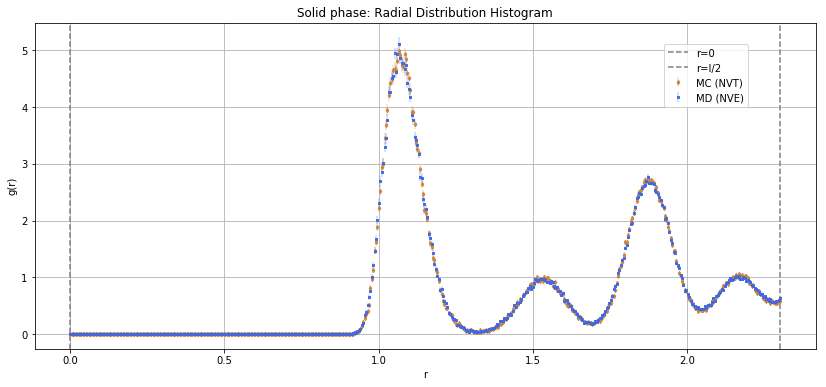

In [125]:
import numpy as np
import matplotlib.pyplot as plt

# Read data from first file
data1 = np.loadtxt("./tail/7.3/RDF_RESULTS_solid.dat")
bin_index1 = data1[:, 0]
g_r_avg1 = data1[:, 1]
g_r_err1 = data1[:, 2]

# Read data from second file
data2 = np.loadtxt("./tail/7.4/RDF_RESULTS_solid.dat")
bin_index2 = data2[:, 0]
g_r_avg2 = data2[:, 1]
g_r_err2 = data2[:, 2]

# Plotting g(r) from first file
plt.figure(figsize=(14, 6))
plt.errorbar(bin_index1, g_r_avg1, yerr=g_r_err1, markersize=3, fmt='d', linewidth=0.4 , label='MC (NVT)', color='peru', ecolor='peru')

# Plotting g(r) from second file
plt.errorbar(bin_index2, g_r_avg2, yerr=g_r_err2, markersize=2, fmt='s', linewidth=0.4 , label='MD (NVE)', color='royalblue', ecolor='royalblue')

plt.xlabel('r')
plt.ylabel('g(r)')
plt.title('Solid phase: Radial Distribution Histogram')
plt.grid(True)

# Add vertical lines
plt.axvline(x=0, color='gray', linestyle='--', label='r=0')
plt.axvline(x=np.max(bin_index1), color='gray', linestyle='--', label='r=l/2')

# Adjust legend position
plt.legend(loc='upper right', bbox_to_anchor=(0.92, 0.95))

plt.show()


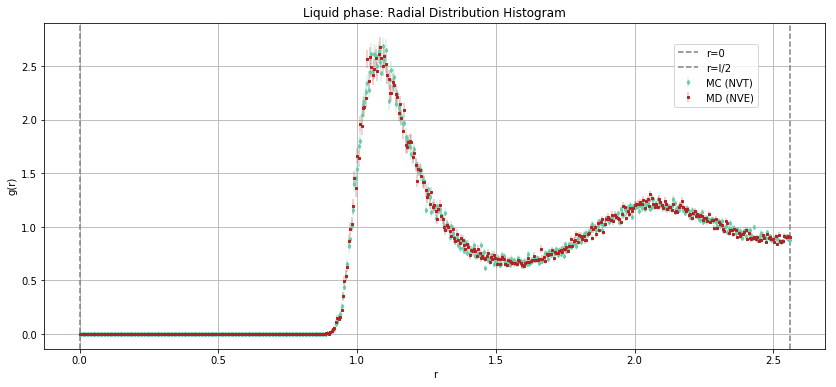

In [152]:
import numpy as np
import matplotlib.pyplot as plt

# Read data from first file
data1 = np.loadtxt("./tail/7.3/RDF_RESULTS_liquid.dat")
bin_index1 = data1[:, 0]
g_r_avg1 = data1[:, 1]
g_r_err1 = data1[:, 2]

# Read data from second file
data2 = np.loadtxt("./tail/7.4/RDF_RESULTS_liquid.dat")
bin_index2 = data2[:, 0]
g_r_avg2 = data2[:, 1]
g_r_err2 = data2[:, 2]

# Plotting g(r) from first file
plt.figure(figsize=(14, 6))
plt.errorbar(bin_index1, g_r_avg1, yerr=g_r_err1, markersize=3, fmt='d', linewidth=0.4 , label='MC (NVT)', color='mediumaquamarine', ecolor='mediumaquamarine')

# Plotting g(r) from second file
plt.errorbar(bin_index2, g_r_avg2, yerr=g_r_err2, markersize=2, fmt='s', linewidth=0.4 , label='MD (NVE)', color='firebrick', ecolor='firebrick')

plt.xlabel('r')
plt.ylabel('g(r)')
plt.title('Liquid phase: Radial Distribution Histogram')
plt.grid(True)

# Add vertical lines
plt.axvline(x=0, color='gray', linestyle='--', label='r=0')
plt.axvline(x=np.max(bin_index1), color='gray', linestyle='--', label='r=l/2')

# Adjust legend position
plt.legend(loc='upper right', bbox_to_anchor=(0.92, 0.95))

plt.show()


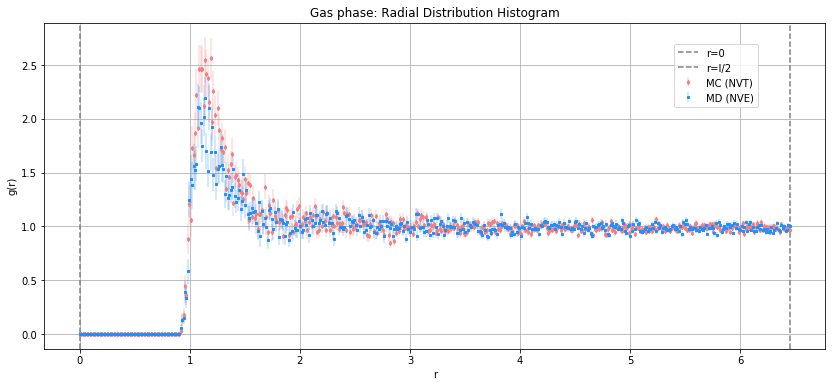

In [164]:
import numpy as np
import matplotlib.pyplot as plt

# Read data from the first file (MC (NVT))
data1 = np.loadtxt("./tail/7.3/RDF_RESULTS_gas.dat")
bin_index1 = data1[:, 0]
g_r_avg1 = data1[:, 1]
g_r_err1 = data1[:, 2]

# Read data from the second file (MD (NVE))
data2 = np.loadtxt("./tail/7.4/RDF_RESULTS_gas.dat")
bin_index2 = data2[:, 0]
g_r_avg2 = data2[:, 1]
g_r_err2 = data2[:, 2]

# Plotting g(r) from the first file
plt.figure(figsize=(14, 6))
plt.errorbar(bin_index1, g_r_avg1, yerr=g_r_err1, markersize=3, fmt='d', linewidth=0.4 , label='MC (NVT)', color='lightcoral', ecolor='lightcoral')

# Plotting g(r) from the second file
plt.errorbar(bin_index2, g_r_avg2, yerr=g_r_err2, markersize=2, fmt='s', linewidth=0.4 , label='MD (NVE)', color='dodgerblue', ecolor='dodgerblue')

plt.xlabel('r')
plt.ylabel('g(r)')
plt.title('Gas phase: Radial Distribution Histogram')
plt.grid(True)

# Add vertical lines
plt.axvline(x=0, color='gray', linestyle='--', label='r=0')
plt.axvline(x=np.max(bin_index1), color='gray', linestyle='--', label='r=l/2')

# Adjust legend position
plt.legend(loc='upper right', bbox_to_anchor=(0.92, 0.95))

plt.show()